In [1]:
#lets import modules
import torch.nn as nn
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# data exploratory analysis

In [2]:
train_dataset=datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor(),
    target_transform=None
)

test_dataset=datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
class_names=train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
label2id=train_dataset.class_to_idx
label2id

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
#turn the data into data loader
train_dataloader=DataLoader(train_dataset,
                           batch_size=32,
                           shuffle=True,
                           )

test_dataloader=DataLoader(test_dataset,
                          batch_size=32,
                          shuffle=True)

In [7]:
#set up device
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# create Convolutional Neural Network using torch

In [8]:
class CNN_Fmnist(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_layer:int,
                 output_shape:int
                ):
        super().__init__()
        self.block_1=nn.Sequential(
            nn.Conv2d(
                     in_channels=input_shape,
                     out_channels=hidden_layer,
                     kernel_size=3,
                     padding=1,
                     stride=1
                     ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_layer,
                out_channels=hidden_layer,
                kernel_size=3,
                padding=1,
                stride=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block_2=nn.Sequential(
            
        nn.Conv2d(
            in_channels=hidden_layer,
            out_channels=hidden_layer,
            kernel_size=3,
            padding=1,
            stride=1
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                 out_channels=hidden_layer,
                 kernel_size=2,
                 padding=1,
                 stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    
        self.classifier=nn.Sequential(
            #this is the last layer that categorizes the output of the model into labels(possible output)
            
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_layer*7*7,# so that the shape matches with the one from the second block of convolutional layer
                    
            out_features=output_shape
            )
        )
        
    def forward(self,x:torch.Tensor):
        x=self.block_1(x)
  #      print(f"output shape of conv block_1: {x.shape}")   #printing after the first block of convolutional layer
        x=self.block_2(x) 
   #     print(f"output shape of conv block_2: {x.shape}")  #printing after the second block of convolutional layer
        x=self.classifier(x)
    #    print(f"output shape of classifier: {x.shape}")
        return x

In [9]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
image,target=train_dataset[1]
image.shape

torch.Size([1, 28, 28])

In [11]:
temp=torch.randn(4,20,20)
torch.flatten(temp).shape

torch.Size([1600])

In [12]:
len(class_names)

10

In [14]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#define our model
cnn_classifier=CNN_Fmnist(
    input_shape=1,
    hidden_layer=10,
    output_shape=len(class_names) #this is the number of classes
).to(device)

In [15]:
#the number of parameter on this model is
cnn_parameter=0
for p in cnn_classifier.parameters():
    p=p.numel()
    cnn_parameter+=p
print(f"the number of parameter on this model is:{cnn_parameter} ")

the number of parameter on this model is:7240 


In [16]:
#total number of mon learable parameters
learn_param=0
for p in cnn_classifier.parameters():
    if p.requires_grad:
        p=p.numel()
        learn_param+=p
print(f"set of all parameters is {learn_param}")

set of all parameters is 7240


## check out the CONV2D opertaion
- this basically applies the y=ax+b in 2d plane i,e in height and width for batches with controlled input and output shapes and with extra
- featurues like padding,strides and kenel features

In [17]:
torch.manual_seed(42)

test_image=torch.randn((3,64,64)).unsqueeze(dim=0)
#lets check out the conwd
conv2d=nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3 ,
    stride=1,
    padding=0
)
conv2d

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))

## check out the maxpool layer 

In [21]:
# try it out on our test image
max_pooled=nn.MaxPool2d(
    kernel_size=4
)
print(f"original shape of the data is:{test_image.shape} ")
#lets pass the test image through the conv layer and then through the max pooled
x=conv2d(test_image)
print(f"this is the shape when gone through the conv layer {x.shape} ")
x=max_pooled(x)
print(f"this is the shape when passing from conv layer to maxpooled layer {x.shape} ")


original shape of the data is:torch.Size([1, 3, 64, 64]) 
this is the shape when gone through the conv layer torch.Size([1, 10, 62, 62]) 
this is the shape when passing from conv layer to maxpooled layer torch.Size([1, 10, 15, 15]) 


In [22]:
torch.manual_seed(42)

t1=torch.randn(size=(1,1,2,2))
print(f"original shape {t1.shape} ")
print(f"origina value:\n {t1} ")
max_pool=nn.MaxPool2d(kernel_size=2)
t1_pool=max_pool(t1)
print(f"the max pooled shape is {t1_pool.shape} ")
print(f"after is has been pooled :\n {t1_pool} ")

original shape torch.Size([1, 1, 2, 2]) 
origina value:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) 
the max pooled shape is torch.Size([1, 1, 1, 1]) 
after is has been pooled :
 tensor([[[[0.3367]]]]) 


# lets train our tiny vgg model on dummy data

### lets view our data and its shape

label: 5


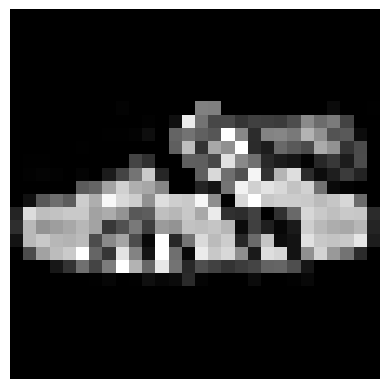

In [23]:
torch.manual_seed(42)
image,label=next(iter(train_dataloader))
image_0,label_0=image[0],label[0]

plt.imshow(image_0.squeeze() ,cmap="gray");
print("label:",label_0.item())
plt.axis(False);

In [24]:
image.shape

torch.Size([32, 1, 28, 28])

In [25]:
cnn_classifier

CNN_Fmnist(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [26]:
cnn_classifier

CNN_Fmnist(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# feed forward pass

In [27]:
rand_image_tensor=torch.randn([1,28,28])
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [28]:
image_0.shape

torch.Size([1, 28, 28])

In [29]:
print(cnn_classifier(rand_image_tensor.unsqueeze(0)))

tensor([[ 0.0578,  0.0395, -0.1376,  0.0809, -0.1321,  0.1294,  0.0505, -0.0561,
          0.0870, -0.0228]], grad_fn=<AddmmBackward0>)


In [30]:
from helper_function import accuracy_fn

In [31]:
def train_step(
    model:nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:nn.Module,
    accuracy_fn,
    optimizer:torch.optim,
    device:torch.device=device
):
    """
    calculate the trainig models loss and caccuracy
    """
    model.train()
    
    train_loss,train_acc=0,0
    
    for batch,(x,y) in enumerate(data_loader):
        #put the data on the same device
        x.to(device)
        y.to(device)
        
        y_pred_train=model(x)

        
        #calculate the loss
        #  loss=loss_fn(y_pred_train,y)
        # acc=accuracy_fn(y,y_pred_train.argmax(dim=1))

        #store accuracy
        train_acc+=accuracy_fn(y,y_pred_train.argmax(dim=1))
        
       
        #calculate loss
        loss=loss_fn(y_pred_train,y)

         #update cumulative loss
        train_loss+=loss
        
        #optimizer
        optimizer.zero_grad()

        #back prop
        loss.backward()
        #update parameter
        
        optimizer.step()
        # if(batch%400==0):
        #     print(f"number of elements seen {batch*len(x)}/{len(train_dataloader.dataset)} samples")
    
    train_loss/=len(data_loader)  #we are dividing it by the number of elements per batch
    train_acc/=len(data_loader)
    print(f"train loss {train_loss:.3f} | train accuracy {train_acc:.3f} ")

In [32]:
def eval_model(
    model:nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:nn.Module,
    accuracy_fn:accuracy_fn,
    device:torch.device=device
):
    """ this performs model evaliation over a test dataset,
    and returns dictionary
    """
    test_loss=0
    test_acc=0
     #inference mode
    model.eval()
    with torch.inference_mode():  
        
        for x_val,y_val in data_loader:

            x_val.to(device)
            y_val.to(device) 
                
            y_val_pred=model(x_val)
                
            test_loss+=loss_fn(y_val_pred,y_val) #loss of the evaluation model   
            test_acc+=accuracy_fn(y_val,y_val_pred.argmax(dim=1))  #argumetns are y_true and y_pred
            
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    
    return {
        "model_name":model.__class__.__name__,
        "model_loss":test_loss.item(),
        "model_accuracy":test_acc
    }
        

In [33]:
def eval_step(
    model:nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:nn.Module,
    accuracy_fn:accuracy_fn,
    device:torch.device=device
):
    """ this performs model evaliation over a test dataset
    """
    test_loss=0
    test_acc=0
     #inference mode
    model.eval()
    with torch.inference_mode():  
        
        for x_val,y_val in data_loader:

            x_val.to(device)
            y_val.to(device) 
                
            y_val_pred=model(x_val)
                
            test_loss+=loss_fn(y_val_pred,y_val) #loss of the evaluation model   
            test_acc+=accuracy_fn(y_val,y_val_pred.argmax(dim=1))  #argumetns are y_true and y_pred
            
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
    
        print(f"test losst : {test_loss:.3f}% | test accuracy | {test_acc:.2f}%")
        

# lets train our tiny VGG Model on our real data

In [35]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=cnn_classifier.parameters(),
                          lr=0.01)

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
from tqdm import tqdm

epochs=3

start_time=timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}------------>")
    train_step(
        model=cnn_classifier,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        optimizer=optimizer,
        device=device
    )
    #lets evaluate the model
    eval_step(
        model=cnn_classifier,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

end_time=timer()

time_taken= end_time - start_time

print(f"the amount of time taken to train our model is:{time_taken} ")

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch:0------------>
train loss 1.552 | train accuracy 42.637 


 33%|████████████████████████████                                                        | 1/3 [00:47<01:34, 47.22s/it]

test losst : 0.658% | test accuracy | 76.45%
Epoch:1------------>
train loss 0.566 | train accuracy 79.718 


 67%|████████████████████████████████████████████████████████                            | 2/3 [01:31<00:45, 45.24s/it]

test losst : 0.522% | test accuracy | 80.48%
Epoch:2------------>
train loss 0.468 | train accuracy 83.212 


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:15<00:00, 45.29s/it]

test losst : 0.468% | test accuracy | 83.53%
the amount of time taken to train our model is:135.8809406 


In [243]:
cnn_model_results=eval_model(
    model=cnn_classifier,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

In [41]:
temp=torch.randn(size=(3,4))
torch.softmax(temp,dim=1)

tensor([[0.1174, 0.4658, 0.2760, 0.1408],
        [0.0500, 0.1507, 0.7156, 0.0837],
        [0.2457, 0.4686, 0.1736, 0.1121]])

In [80]:
def make_predictions(model:nn.Module,
                     input_data:list,
                     device:torch.device=device
                    ):
    preds_prob=[]
    model.to(device)
    model.eval()    
    with torch.inference_mode():
        for data in input_data:
            data=torch.unsqueeze(data,dim=0).to(device)   #to add a batch size we squeeze it.
            y_pred_logits=model(data)
            
            y_pred=torch.softmax(y_pred_logits.squeeze(),dim=0)
            preds_prob.append(y_pred.cpu())  #when visualizing we want to make our data in cpu rather than "GPU"
    return torch.stack(preds_prob)

In [81]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [82]:
feature,label=test_dataset[0][:10]
feature.shape,label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Pullover')

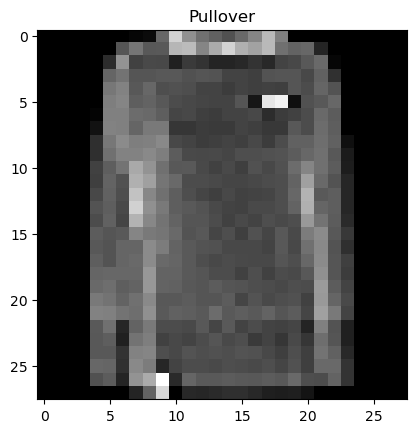

In [147]:
#torch.manual_seed(42)
#torch.cuda.manual_seed(42)

import random

#we are gonna select data randomly and check our modl
test_samples=[]
test_labels=[]

for samples,label in random.sample(list(test_dataset),k=9):
    test_samples.append(samples)
    test_labels.append(label)
#view the dataset
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [148]:
#make predictions
pred_probs=make_predictions(model=cnn_classifier,
                           input_data=test_samples)
pred_probs[:2]

tensor([[1.2371e-01, 4.6071e-03, 6.0263e-01, 7.2212e-03, 1.4644e-02, 3.1038e-05,
         2.3135e-01, 7.1995e-06, 1.5796e-02, 2.2009e-06],
        [2.3510e-03, 4.4347e-03, 2.8702e-01, 4.1883e-04, 6.0546e-01, 1.3977e-07,
         9.0352e-02, 2.8725e-07, 9.9578e-03, 8.3803e-07]])

In [149]:
pred_class=pred_probs.argmax(dim=1)
pred_class

tensor([2, 4, 0, 4, 4, 6, 2, 8, 0])

In [150]:
test_labels

[2, 4, 0, 2, 4, 6, 2, 8, 6]

## lets visualize our comparision

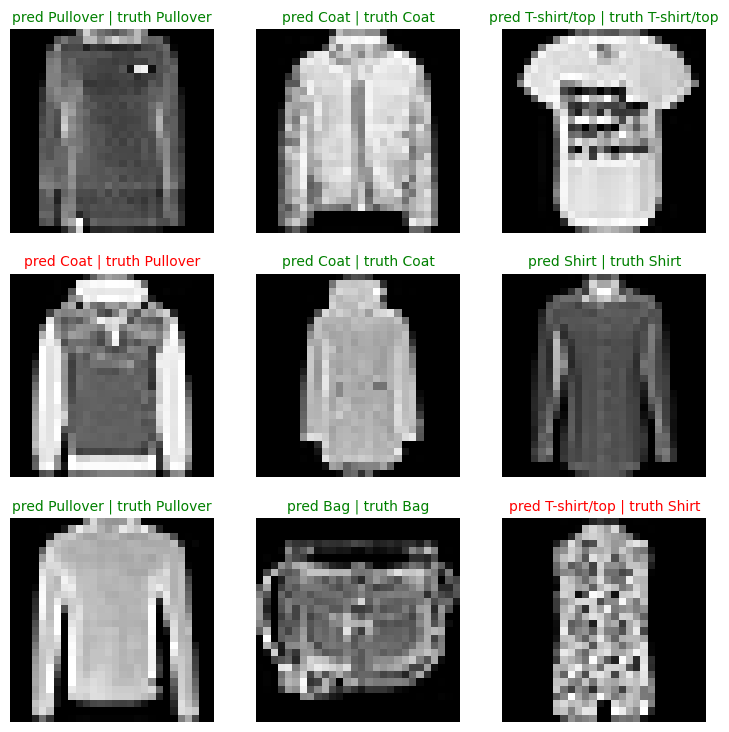

In [151]:
plt.figure(figsize=(9,9))


for i,sample in enumerate(test_samples):
    
    ncols=3
    nrows=3
    
   
    plt.subplot(ncols,nrows,i+1)
    pred_label=class_names[pred_class[i]]
    
    truth_label=class_names[test_labels[i]]
    plt.imshow(sample.squeeze(),cmap="gray");
    
    text_title=f"pred {pred_label} | truth {truth_label}"
    if truth_label==pred_label:
        plt.title(text_title,fontsize=10,c="g")
    else:
        plt.title(text_title,fontsize=10,c="r")
    plt.axis(False);

# confusion matrix

In [159]:
test_dataloader

In [168]:
# lets evaluate our model
from tqdm.auto import tqdm

cnn_classifier.eval()
y_preds=[]
with torch.inference_mode():
    for x,y in tqdm(test_dataloader,desc="making predictions...."):
        x=x.to(device)
        y=y.to(device)
        
        y_pred_logits=cnn_classifier(x)
        y_pred=torch.softmax(y_pred_logits,dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor=torch.cat(y_preds)

making predictions....: 100%|████████████████████████████████████████████████████████| 313/313 [00:05<00:00, 59.68it/s]


In [169]:
print(y_pred_tensor)

tensor([6, 2, 5,  ..., 4, 6, 3])


In [170]:
len(y_pred_tensor)

10000

In [173]:
try:
    import torchmetrics,mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
    !pip install torchmetrics -U mlxtend 

   ---------------------------------------- 0.0/840.2 kB ? eta -:--:--
   ---------------------------------------- 10.2/840.2 kB ? eta -:--:--
   - ------------------------------------- 30.7/840.2 kB 660.6 kB/s eta 0:00:02
   --- ----------------------------------- 81.9/840.2 kB 573.4 kB/s eta 0:00:02
   ----- -------------------------------- 112.6/840.2 kB 726.2 kB/s eta 0:00:02
   -------- ----------------------------- 184.3/840.2 kB 794.9 kB/s eta 0:00:01
   ----------- -------------------------- 245.8/840.2 kB 942.1 kB/s eta 0:00:01
   ---------------- ----------------------- 337.9/840.2 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 501.8/840.2 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 583.7/840.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 840.2/840.2 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/170.9 kB ? eta -:--:--
   ---------------------------------------- 170.9/170.9 kB ? eta 0

In [176]:
import torchmetrics,mlxtend

In [177]:
mlxtend.__version__

'0.23.1'

In [207]:
type(y_pred_tensor)

torch.Tensor

In [208]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [213]:
#confusion metrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

cm=ConfusionMatrix(num_classes=len(class_names),task="multiclass")
cm_tensor=cm(preds=y_pred_tensor,target=test_dataset.targets)

In [212]:
cm_tensor

tensor([[ 57,  66, 103, 154, 109, 106,  94, 109, 119,  83],
        [ 39,  71, 102, 150, 118, 104, 105, 108, 110,  93],
        [ 59,  58, 111, 156, 105, 103,  94, 119, 106,  89],
        [ 57,  71, 100, 140, 104, 118, 132,  98, 108,  72],
        [ 43,  77, 115, 166, 114,  96,  92,  97, 128,  72],
        [ 64,  77, 106, 144,  95, 108, 127,  99, 107,  73],
        [ 58,  74,  94, 159, 101,  97, 108, 126, 104,  79],
        [ 76,  71, 120, 134, 100, 119, 101,  92, 101,  86],
        [ 52,  73, 111, 153, 120,  92, 101, 106, 109,  83],
        [ 58,  75, 106, 157, 105, 103, 102,  96, 110,  88]])

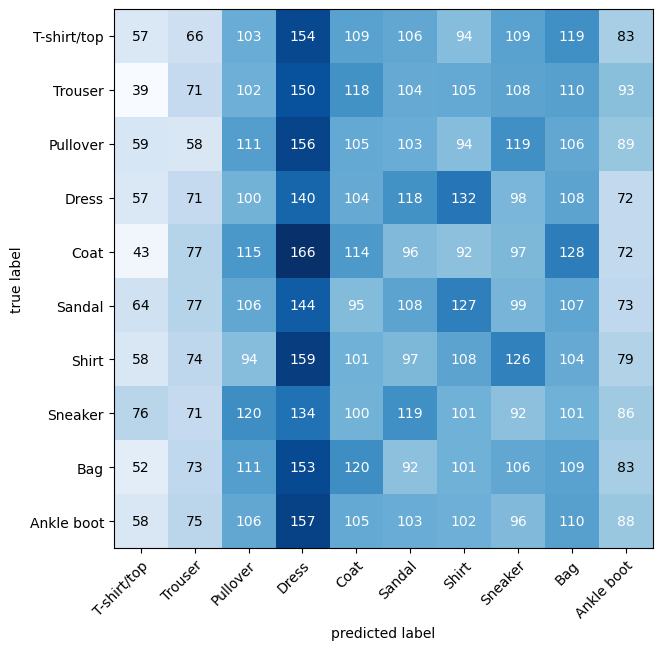

In [219]:
#lets plot the confusion matric 
fig,ax=plot_confusion_matrix(
    conf_mat=cm_tensor.numpy() ,
  #  colorbar=True,
    class_names=class_names,
 #   show_absolute=False,
  #  show_normed=True,
    figsize=(10,7)
)
plt.show()

# lets save and load our model

In [225]:
from pathlib import Path

model_path=Path("models")
model_path.mkdir(parents=True,
                exist_ok=True)

#create a model path
model_name="cnn_classifier_model.pth"
model_save_name=model_path/model_name

model_save_name

WindowsPath('models/cnn_classifier_model.pth')

In [227]:
#save the model
torch.save(obj=cnn_classifier.state_dict(),f=model_save_name)

## load the model

In [234]:
loaded_cnn=CNN_Fmnist(
    input_shape=1,
    hidden_layer=10,
    output_shape=len(class_names)
)

#load the saved parameters 
loaded_cnn.load_state_dict(torch.load(f=model_save_name))

<All keys matched successfully>

In [237]:
loaded_cnn.to(device)

CNN_Fmnist(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [241]:
#evaluaing our loaded model
torch.manual_seed(42)
loaded_model_results=eval_model(
    model=loaded_cnn,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

In [242]:
loaded_model_results

{'model_name': 'CNN_Fmnist',
 'model_loss': 0.46670931577682495,
 'model_accuracy': 83.56629392971246}

In [254]:
#check for the clossness of the predicted and actual value
torch.isclose(torch.tensor(loaded_model_results["model_loss"]),
              torch.tensor(cnn_model_results["model_loss"]),
             atol=1e-3)

tensor(True)